In [74]:
# Importing all the necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import TomekLinks

In [75]:
# For reading data
diabetes_dataset = pd.read_csv("../dataset/diabetes.csv") # ..->current directory

In [76]:
# Check the data
diabetes_dataset.head() # first 5 rows

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [77]:
# Size of the dataset
diabetes_dataset.shape

(768, 9)

In [78]:
# Statistical summary
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Figure size 1200x1000 with 0 Axes>

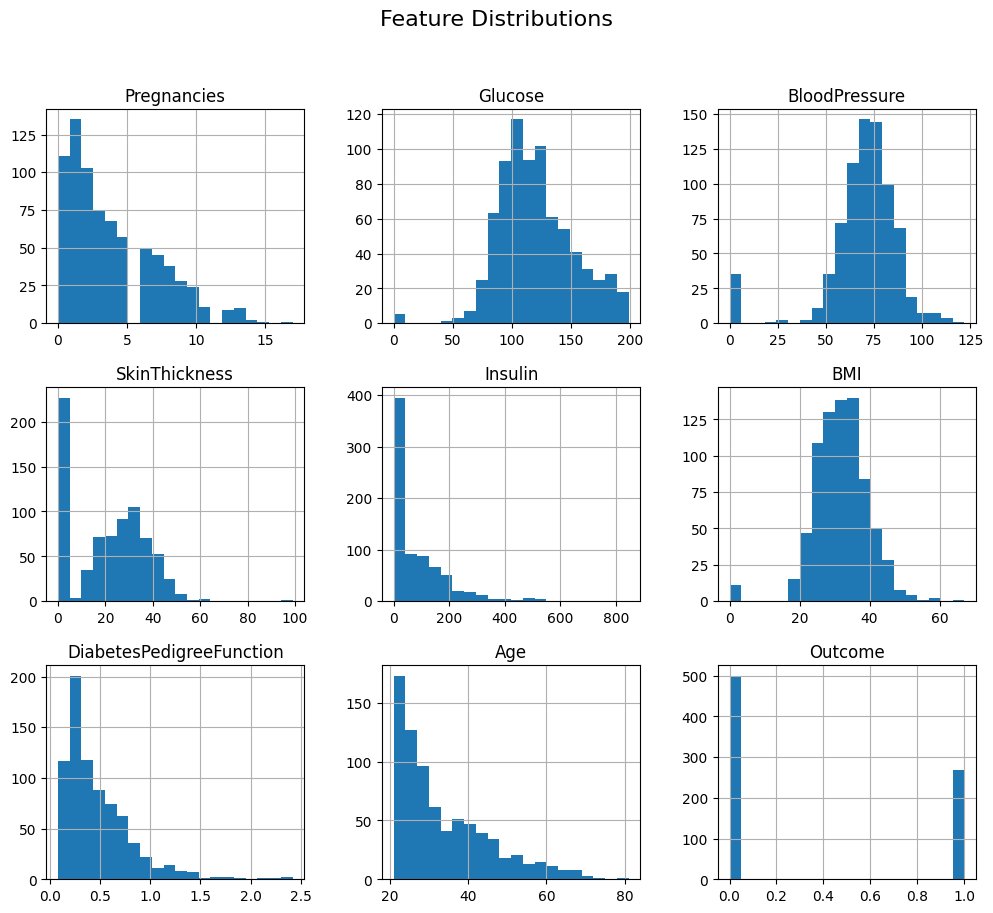

In [79]:
plt.figure(figsize=(12, 10))
diabetes_dataset.hist(figsize=(12, 10), bins=20)
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

In [80]:
diabetes_dataset.reset_index(drop=True, inplace=True)

In [81]:
# Compute the correlation matrix
correlation_matrix = diabetes_dataset.corr()

# Check for NaN values in the correlation matrix
print(correlation_matrix.isna().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [82]:
print(diabetes_dataset.nunique())

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64


In [83]:
print(diabetes_dataset.corr())

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

In [84]:
print(diabetes_dataset.dtypes)

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [85]:
# Get correlation with target variable
target_column = "Outcome"  # Ensure this is the correct target column
correlations = diabetes_dataset.corr()[target_column].sort_values(ascending=False)
print(correlations)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64


In [86]:
# Unique count for diabetes and non-diabetic patients
diabetes_dataset['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [87]:
diabetes_dataset.groupby('Outcome').mean() # Groups the data according to column and displays ean of them

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [88]:
X = diabetes_dataset.drop(columns=['Outcome'],axis=1)
y = diabetes_dataset['Outcome']

In [89]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [90]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [91]:
X_train.shape

(614, 8)

In [92]:
X_test.shape

(154, 8)

In [93]:
y_train.shape

(614,)

In [94]:
y_test.shape

(154,)

In [95]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84,0,0,0,0.0,0.304,21
618,9,112,82,24,0,28.2,1.282,50
346,1,139,46,19,83,28.7,0.654,22
294,0,161,50,0,0,21.9,0.254,65
231,6,134,80,37,370,46.2,0.238,46


In [96]:
model = svm.SVC(kernel='linear', random_state=42)

In [97]:
model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [98]:
y_pred = model.predict(X_test)

In [99]:
print(accuracy_score(y_test, y_pred))

0.7532467532467533


In [100]:
print(f"Confusion Matrix - {model}")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix - SVC(kernel='linear', random_state=42)
[[80 19]
 [19 36]]


In [101]:
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))

0.6545454545454545
0.6545454545454545


In [102]:
model_2 = DecisionTreeClassifier(random_state=42)

In [103]:
model_2.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [104]:
y_pred_2 = model_2.predict(X_test)

In [105]:
print(accuracy_score(y_test, y_pred_2))

0.7467532467532467


In [106]:
print(f"Confusion Matrix - {model_2}")
print(confusion_matrix(y_test, y_pred_2))

Confusion Matrix - DecisionTreeClassifier(random_state=42)
[[75 24]
 [15 40]]


In [107]:
print(precision_score(y_test, y_pred_2))
print(recall_score(y_test, y_pred_2))

0.625
0.7272727272727273


In [108]:
model_3 = LogisticRegression(C=3.0, solver='liblinear')

In [109]:
model_3.fit(X_train, y_train)

LogisticRegression(C=3.0, solver='liblinear')

In [110]:
y_pred_3 = model_3.predict(X_test)

In [111]:
# Accuracy
print(accuracy_score(y_test, y_pred_3))

0.7532467532467533


In [112]:
print(f"Confusion Matrix - {model_3}")
print(confusion_matrix(y_test, y_pred_3))

Confusion Matrix - LogisticRegression(C=3.0, solver='liblinear')
[[80 19]
 [19 36]]


In [113]:
print(precision_score(y_test, y_pred_3))
print(recall_score(y_test, y_pred_3))

0.6545454545454545
0.6545454545454545


In [114]:
model_4 = RandomForestClassifier(n_estimators=100, random_state=42)

In [115]:
model_4.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [116]:
y_pred_4 = model_4.predict(X_test)

In [117]:
# Accuracy
print(accuracy_score(y_test, y_pred_4))

0.7207792207792207


In [118]:
print(f"Confusion Matrix - {model_4}")
print(confusion_matrix(y_test, y_pred_4))

Confusion Matrix - RandomForestClassifier(random_state=42)
[[77 22]
 [21 34]]


In [119]:
print(precision_score(y_test, y_pred_4))
print(recall_score(y_test, y_pred_4))

0.6071428571428571
0.6181818181818182


In [120]:
tomek = TomekLinks()
X_train_res, y_train_res = tomek.fit_resample(X_train, y_train)

In [121]:
model = svm.SVC(kernel='linear', random_state=42)

In [122]:
model.fit(X_train_res, y_train_res)

SVC(kernel='linear', random_state=42)

In [123]:
y_pred = model.predict(X_test)

In [124]:
print(accuracy_score(y_test, y_pred))

0.7337662337662337


In [125]:
print(f"Confusion Matrix - {model}")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix - SVC(kernel='linear', random_state=42)
[[76 23]
 [18 37]]


In [126]:
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))

0.6166666666666667
0.6727272727272727


In [127]:
model_2 = DecisionTreeClassifier(random_state=42)

In [128]:
model_2.fit(X_train_res, y_train_res)

DecisionTreeClassifier(random_state=42)

In [129]:
y_pred_2 = model_2.predict(X_test)

In [130]:
print(accuracy_score(y_test, y_pred_2))

0.6753246753246753


In [131]:
print(f"Confusion Matrix - {model_2}")
print(confusion_matrix(y_test, y_pred_2))

Confusion Matrix - DecisionTreeClassifier(random_state=42)
[[72 27]
 [23 32]]


In [132]:
print(precision_score(y_test, y_pred_2))
print(recall_score(y_test, y_pred_2))

0.5423728813559322
0.5818181818181818


In [133]:
model_3 = LogisticRegression(C=3.0, solver='liblinear')

In [134]:
model_3.fit(X_train_res, y_train_res)

LogisticRegression(C=3.0, solver='liblinear')

In [135]:
y_pred_3 = model_3.predict(X_test)

In [136]:
# Accuracy
print(accuracy_score(y_test, y_pred_3))

0.7337662337662337


In [137]:
print(f"Confusion Matrix - {model_3}")
print(confusion_matrix(y_test, y_pred_3))

Confusion Matrix - LogisticRegression(C=3.0, solver='liblinear')
[[76 23]
 [18 37]]


In [138]:
print(precision_score(y_test, y_pred_3))
print(recall_score(y_test, y_pred_3))

0.6166666666666667
0.6727272727272727


In [139]:
model_4 = RandomForestClassifier(n_estimators=100, random_state=42)

In [140]:
model_4.fit(X_train_res, y_train_res)

RandomForestClassifier(random_state=42)

In [141]:
y_pred_4 = model_4.predict(X_test)

In [142]:
# Accuracy
print(accuracy_score(y_test, y_pred_4))

0.7467532467532467


In [143]:
print(f"Confusion Matrix - {model_4}")
print(confusion_matrix(y_test, y_pred_4))

Confusion Matrix - RandomForestClassifier(random_state=42)
[[74 25]
 [14 41]]


In [144]:
print(precision_score(y_test, y_pred_4))
print(recall_score(y_test, y_pred_4))

0.6212121212121212
0.7454545454545455


In [145]:
import pickle
filename = 'diabetes_model.sav'
pickle.dump(model_4, open(filename, 'wb'))